In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('extended_salary_data.csv')
m, n = df.shape
df.insert(0, column='0', value=np.ones(m))

In [125]:
x = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

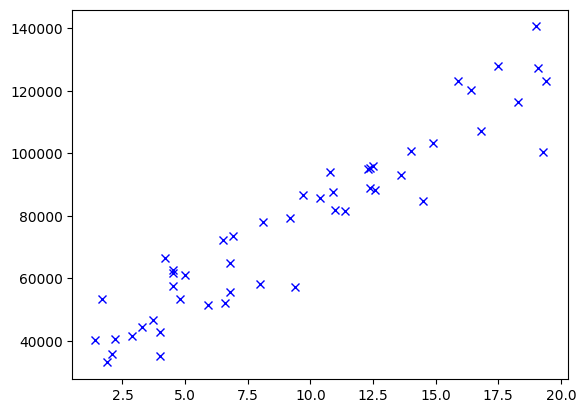

In [92]:
plt.plot(x[:,1], y, 'bx', linewidth=2)

In [98]:
df.describe()

,0,YearsExperience,Salary
count,50.0,50.000000,50.00000
mean,1.0,9.480000,77370.54740
std,0.0,5.485491,28298.92442
min,1.0,1.400000,33048.80000
25%,1.0,4.500000,53861.88000
50%,1.0,9.300000,78598.65000
75%,1.0,13.350000,95356.22500
max,1.0,19.400000,140646.44000


In [84]:
x_train, x_valid = np.split(x, [int(0.8*len(x))])
y_train, y_valid = np.split(y, [int(0.8*len(y))])

In [107]:
class LinearRegression:
    def __init__(self, theta0 = None, eps = 1e-5, a = 3e-5):
        self.theta = theta0
        self.eps = eps
        self.a = a
    def fit(self, x, y):
        m, n = x.shape
        self.theta = np.zeros(n)
        while True:
            oldtheta = np.copy(self.theta)
            self.theta += self.a * np.dot((y - np.dot(x, self.theta)), x) /m
            if np.linalg.norm(self.theta - oldtheta, ord=1) < self.eps:
                break
    def predict(self, x):
        return np.dot(x, self.theta)

In [108]:
model = LinearRegression()
model.fit(x_train, y_train)

In [109]:
print(model.theta)

[29575.02667529  5013.87030258]


In [90]:
mse_valid = np.linalg.norm(y_valid - model.predict(x_valid), ord=2)
mae_valid = np.linalg.norm(y_valid - model.predict(x_valid), ord=1)
mae_train = np.linalg.norm(y_train - model.predict(x_train), ord=1)
mse_train = np.linalg.norm(y_train - model.predict(x_train), ord=2)
print(mse_valid, mse_train, mae_valid, mae_train)

22685.13951336019 60247.788115139025 61954.85247672654 301521.90248416807


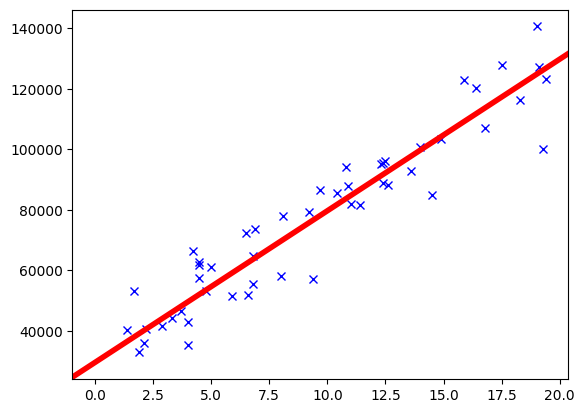

In [91]:
plt.plot(x[:,1], y, 'bx', linewidth=2)
plt.axline((0, model.theta[0]), slope=model.theta[1] , linewidth=4, color='r')
plt.show()

**BONUS**

In [190]:
df = pd.read_csv('extended_salary_data.csv')
m, n = df.shape
df.insert(0, column='intercept', value=np.ones(m))

In [191]:
df.insert(2, column='NumProjectsCompleted', value=np.array((df['YearsExperience'])/2 + 1).astype(int))

In [192]:
#adding noise
noise = np.random.poisson(1, m)
df['NumProjectsCompleted'] += noise

In [193]:
print(df)

    intercept  YearsExperience  NumProjectsCompleted     Salary
0         1.0              8.1                     6   77884.67
1         1.0             19.1                    11  127213.68
2         1.0             14.9                    10  103343.52
3         1.0             12.4                     7   88988.96
4         1.0              4.0                     3   35214.78
5         1.0              4.0                     4   42801.56
6         1.0              2.1                     3   35893.61
7         1.0             17.5                    10  128071.22
8         1.0             12.4                     8   95436.18
9         1.0             14.5                     9   84869.60
10        1.0              1.4                     1   40240.84
11        1.0             19.4                    12  123149.18
12        1.0             16.8                    10  107230.78
13        1.0              5.0                     5   61116.76
14        1.0              4.5          

In [194]:
x = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

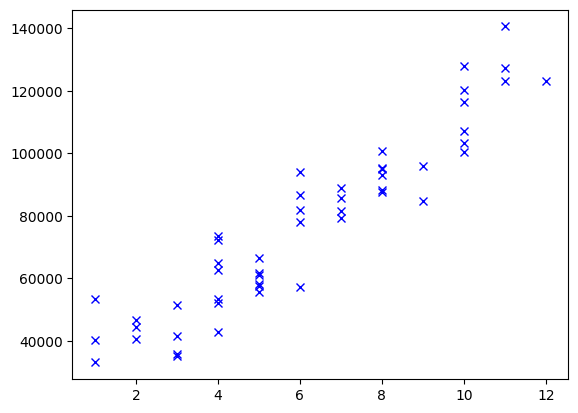

In [195]:
plt.plot(x[:,2], y, 'bx', linewidth=2)

In [196]:
x_train, x_valid = np.split(x, [int(0.8*len(x))])
y_train, y_valid = np.split(y, [int(0.8*len(y))])

In [197]:
model_new = LinearRegression()
model_new.fit(x_train, y_train)

In [198]:
model_new.theta

array([23911.23286449,  2653.962012  ,  4506.22900051])

In [199]:
mse_valid = np.linalg.norm(y_valid - model_new.predict(x_valid), ord=2)
mae_valid = np.linalg.norm(y_valid - model_new.predict(x_valid), ord=1)
mae_train = np.linalg.norm(y_train - model_new.predict(x_train), ord=1)
mse_train = np.linalg.norm(y_train - model_new.predict(x_train), ord=2)
print(mse_valid, mse_train, mae_valid, mae_train)

25270.476502682315 56088.5742698578 50723.24185047574 286003.9875557405
